In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

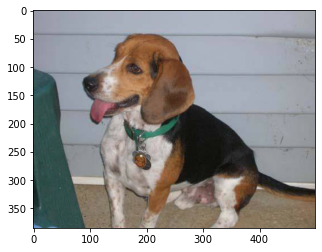

In [4]:
DATADIR = '/Users/ramyaneelakantan/ACM internship/cat-dog-small-dataset/'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES : 
    path = os.path.join(DATADIR, category) # Path: /Users/ramyaneelakantan/ACM internship/cat-dog-small-dataset/Dog
    for img in os.listdir(path) : 
        img_array = cv2.imread(os.path.join(path, img))[...,::-1]
        plt.imshow(img_array, cmap = 'viridis')
        plt.show()
        break
    break

In [5]:
print(img_array)

[[[150 152 167]
  [150 152 167]
  [151 153 168]
  ...
  [163 166 173]
  [163 166 173]
  [163 166 173]]

 [[150 152 167]
  [150 152 167]
  [151 153 168]
  ...
  [163 166 173]
  [163 166 173]
  [163 166 173]]

 [[150 152 167]
  [150 152 167]
  [151 153 168]
  ...
  [163 166 173]
  [163 166 173]
  [163 166 173]]

 ...

 [[ 97 142 210]
  [101 144 212]
  [103 147 212]
  ...
  [125 111  85]
  [125 111  85]
  [125 111  85]]

 [[ 98 142 217]
  [100 144 217]
  [101 145 216]
  ...
  [114 100  74]
  [114 100  74]
  [115 101  75]]

 [[ 98 136 209]
  [104 143 212]
  [109 149 211]
  ...
  [110  94  71]
  [112  96  73]
  [114  98  75]]]


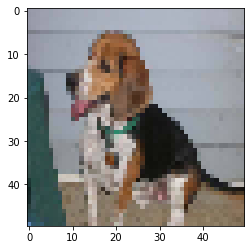

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'viridis')
plt.show()

In [7]:
training_data = []
IMG_SIZE = 50

def create_training_data() : 
    for category in CATEGORIES : 
        path = os.path.join(DATADIR, category) # Path: /Users/ramyaneelakantan/ACM internship/cat-dog-small-dataset/Dog
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path) : 
            try : 
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e : 
                pass

create_training_data()

In [8]:
len(training_data)

1000

In [9]:
import random

random.shuffle(training_data)

In [10]:
x = []
y = []

for features, label in training_data : 
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y).reshape(-1, 1)

In [11]:
x.shape

(1000, 50, 50, 3)

In [12]:
import pickle as pkl

pkl_out = open("x.pickle", 'wb')
pkl.dump(x, pkl_out)
pkl_out.close()

pkl_out = open("y.pickle", 'wb')
pkl.dump(y, pkl_out)
pkl_out.close()

In [13]:
pkl_in = open("x.pickle", 'rb')
x = pkl.load(pkl_in)

In [14]:
x = pkl.load(open("x.pickle", 'rb'))
y = pkl.load(open("y.pickle", 'rb'))

In [14]:
model1 = Sequential()

model1.add( Conv2D(32, (3, 3), activation='relu', input_shape = (50, 50, 3)) )
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(1, activation = 'sigmoid')) # 2 because we have cat and dog classes

model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 128)       7

In [15]:
model1.fit(x, y, batch_size = 32, epochs = 20, validation_split = 0.2)

In [3]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0

In [16]:
model2.fit(x, y, batch_size = 32, epochs = 20, validation_split = 0.2)

In [15]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='tanh', input_shape=(50, 50, 3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), activation='tanh'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3), activation='tanh'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512, activation='tanh'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='softmax')) # 2 because we have cat and dog classes

model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0

In [16]:
model3.fit(x, y, batch_size = 32, epochs = 20, validation_split = 0.2)